In this project, we will cluster companies using their daily stock price movements (i.e. the difference between the adjusted closing and adjusted opening prices for each trading day). We will be getting our stock data from quandl.

Importing libraries for getting the stock data and for preprocessing

In [1]:

import numpy as np
import pandas as pd
import pandas_datareader.data as web   
import datetime

from matplotlib import pyplot as plt


Define the source of data, the start date, and the end date. 

In [2]:
data_source='quandl'
start_date = '2015-01-01'
end_date = '2017-12-31'

We can now request the stock data of various companies that we are interested in. We will put thees companies in python dictionary. You can add more companies if you'd like. 

In [3]:
companies_dict = {
    'Amazon': 'AMZN',
    'Advanced Micro Devices': 'AMD',
    'Apple': 'AAPL',
    'Delta': 'DAL',
    'JetBlue': 'JBLU',
    'Southwest': 'LUV',
    'Walgreen': 'WBA',
    'Northrop Grumman': 'NOC',
    'Boeing': 'BA',
    'Lockheed Martin': 'LMT',
    'McDonalds':  'MCD',
    'Intel': 'INTC',
    'Nvidia': 'NVDA',
    'Navistar': 'NAV',
    'IBM': 'IBM',
    'Texas Instruments': 'TXN',
    'MasterCard': 'MA',
    'Microsoft': 'MSFT',
    'General Electrics': 'GE',
    'Symantec': 'SYMC',
    'American Express': 'AXP',
    'Pepsi': 'PEP',
    'Coca Cola': 'KO',
    'Johnson & Johnson': 'JNJ',
    'Visa':'V',
    'Bank of America': 'BAC'}

In [4]:
name,symbols = np.array(sorted(companies_dict.items())).T
for symbol in symbols:
    print(symbol)

AMD
AMZN
AXP
AAPL
BAC
BA
KO
DAL
GE
IBM
INTC
JBLU
JNJ
LMT
MA
MCD
MSFT
NAV
NOC
NVDA
PEP
LUV
SYMC
TXN
V
WBA


In [5]:
def create_adujsted_closing_prices(ticker_symbols):
    d = {}
    for ticker_symbol in ticker_symbols:
        d[ticker_symbol.upper()] = web.DataReader(ticker_symbol.upper(),data_source,start_date,end_date)["AdjClose"]
    return pd.DataFrame(d)

In [6]:
adj_close=create_adujsted_closing_prices([symbol for symbol in symbols])

In [9]:
adj_close['AAPL'].index[adj_close['AAPL'].apply(np.isnan)]

DatetimeIndex(['2017-08-07'], dtype='datetime64[ns]', name='Date', freq=None)

In [14]:
adj_close['AAPL'][620:670]

Date
2017-06-20    144.424007
2017-06-21    145.280532
2017-06-22    145.041502
2017-06-23    145.758592
2017-06-26    145.230734
2017-06-27    143.159139
2017-06-28    145.240693
2017-06-29    143.099382
2017-06-30    143.438008
2017-07-03    142.920109
2017-07-05    143.507725
2017-07-06    142.153221
2017-07-07    143.597361
2017-07-10    144.473805
2017-07-11    144.941906
2017-07-12    145.151057
2017-07-13    147.172854
2017-07-14    148.437722
2017-07-17    148.955620
2017-07-18    149.473519
2017-07-19    150.409720
2017-07-20    149.732468
2017-07-21    149.662751
2017-07-24    151.475396
2017-07-25    152.122770
2017-07-26    152.839860
2017-07-27    149.951579
2017-07-28    148.895863
2017-07-31    148.248489
2017-08-01    149.443640
2017-08-02    156.504989
2017-08-03    154.941334
2017-08-04    155.758020
2017-08-07           NaN
2017-08-08    159.433108
2017-08-09    160.409148
2017-08-10    155.270000
2017-08-11    157.480000
2017-08-14    159.850000
2017-08-15    161.60

In [15]:
def create_adujsted_opening_prices(ticker_symbols):
    dopen = {}
    for ticker_symbol in ticker_symbols:
        dopen[ticker_symbol.upper()] = web.DataReader(ticker_symbol.upper(),data_source,start_date,end_date)["AdjOpen"]
    return pd.DataFrame(dopen)

In [16]:
adj_open=create_adujsted_opening_prices([symbol for symbol in symbols])

In [17]:
adj_open.head()

,AAPL,AMD,AMZN,AXP,BA,BAC,DAL,GE,IBM,INTC,...,MCD,MSFT,NAV,NOC,NVDA,PEP,SYMC,TXN,V,WBA
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,105.820966,2.70,312.58,88.741729,120.261936,17.308158,47.935429,23.140777,144.856833,33.316353,...,86.583569,43.251617,33.82,141.672787,19.555005,87.772418,19.655050,49.570197,64.556998,72.496098
2015-01-05,102.875953,2.67,307.01,88.065474,118.968205,17.110927,47.493717,22.839418,144.820913,32.889336,...,85.820110,42.982801,33.85,138.959518,19.555005,87.328609,19.479763,49.227759,64.583960,71.515005
2015-01-06,101.213446,2.65,302.24,86.474848,118.408506,16.759761,46.619894,22.337151,143.384108,32.780311,...,85.240617,42.992070,32.76,137.058319,19.253860,86.986507,19.395930,48.950107,63.677054,72.362745
2015-01-07,101.840448,2.63,297.50,86.933981,118.124068,16.490374,45.592432,22.108848,141.166042,32.380551,...,85.783317,42.621289,32.54,138.577367,18.777857,87.957338,18.976764,48.135660,63.346156,71.486429
2015-01-08,103.768957,2.59,300.32,87.344723,119.830692,16.509616,45.592432,22.209302,140.303959,33.043789,...,86.675552,43.335043,33.14,143.153621,18.807000,89.445946,19.213021,49.172228,64.512878,73.629594


In [18]:
adj_open['AAPL'].index[adj_open['AAPL'].apply(np.isnan)]

DatetimeIndex(['2017-08-07'], dtype='datetime64[ns]', name='Date', freq=None)

In [19]:
adj_open['AAPL'][620:670]

Date
2017-06-20    146.276491
2017-06-21    144.931946
2017-06-22    145.180936
2017-06-23    144.543522
2017-06-26    146.575278
2017-06-27    144.424007
2017-06-28    143.906108
2017-06-29    144.125219
2017-06-30    143.866270
2017-07-03    144.294532
2017-07-05    143.109341
2017-07-06    142.442049
2017-07-07    142.322534
2017-07-10    143.527644
2017-07-11    144.145139
2017-07-12    145.280532
2017-07-13    144.912027
2017-07-14    147.372046
2017-07-17    148.218611
2017-07-18    148.597075
2017-07-19    149.871903
2017-07-20    150.887781
2017-07-21    149.383883
2017-07-24    149.971498
2017-07-25    151.186568
2017-07-26    152.730305
2017-07-27    153.128688
2017-07-28    149.284287
2017-07-31    149.294246
2017-08-01    148.497479
2017-08-02    158.636341
2017-08-03    156.415353
2017-08-04    155.439313
2017-08-07           NaN
2017-08-08    157.959089
2017-08-09    158.616422
2017-08-10    159.900000
2017-08-11    156.600000
2017-08-14    159.320000
2017-08-15    160.66

In [11]:
adj_close = np.array(adj_close).T
adj_open = np.array(adj_open).T

In [12]:
row, col = adj_close.shape

print(row)
print(col)

daily_movements = np.zeros([row, col])

for i in range(0,row):
    daily_movements[i, :] = np.subtract(adj_close[i,:], adj_open[i, :])

26
754


In [13]:
daily_movements

array([[-1.95700862e+00, -1.93800853e+00, -2.66001171e-01, ...,
         5.00000000e-01,  8.00000000e-02, -1.29000000e+00],
       [-1.00000000e-02, -1.00000000e-02, -2.00000000e-02, ...,
         8.00000000e-02, -2.00000000e-02, -2.90000000e-01],
       [-4.06000000e+00, -4.82000000e+00, -6.95000000e+00, ...,
         2.35000000e+00, -2.90000000e+00, -1.28800000e+01],
       ...,
       [-7.40406226e-02, -5.04401741e-01, -1.02731364e+00, ...,
         1.10000000e-01, -1.00000000e-01, -1.40000000e-01],
       [ 4.01979940e-01, -1.05887399e+00, -5.61301258e-01, ...,
         1.33000000e+00,  5.00000000e-02, -7.30000000e-01],
       [-1.04776912e-01, -5.52460081e-01, -1.21922225e+00, ...,
        -4.70000000e-01,  6.00000000e-02, -1.00000000e-02]])

In [14]:
companies = sorted(companies_dict.items(), key=lambda x: x[1])
print(companies)

[('Apple', 'AAPL'), ('Advanced Micro Devices', 'AMD'), ('Amazon', 'AMZN'), ('American Express', 'AXP'), ('Boeing', 'BA'), ('Bank of America', 'BAC'), ('Delta', 'DAL'), ('General Electrics', 'GE'), ('IBM', 'IBM'), ('Intel', 'INTC'), ('JetBlue', 'JBLU'), ('Johnson & Johnson', 'JNJ'), ('Coca Cola', 'KO'), ('Lockheed Martin', 'LMT'), ('Southwest', 'LUV'), ('MasterCard', 'MA'), ('McDonalds', 'MCD'), ('Microsoft', 'MSFT'), ('Navistar', 'NAV'), ('Northrop Grumman', 'NOC'), ('Nvidia', 'NVDA'), ('Pepsi', 'PEP'), ('Symantec', 'SYMC'), ('Texas Instruments', 'TXN'), ('Visa', 'V'), ('Walgreen', 'WBA')]


In [15]:
for i in range(0, len(companies)):
    print('Company: {}, Change: {}'.format(companies[i][0], sum(daily_movements[i][:])))

Company: Apple, Change: nan
Company: Advanced Micro Devices, Change: -1.725199999999992
Company: Amazon, Change: nan
Company: American Express, Change: 7.639237033212211
Company: Boeing, Change: 112.16999029481744
Company: Bank of America, Change: -3.950493235761993
Company: Delta, Change: -17.846381153343017
Company: General Electrics, Change: 4.632916493148873
Company: IBM, Change: 16.748678252939868
Company: Intel, Change: nan
Company: JetBlue, Change: 0.31499999999999595
Company: Johnson & Johnson, Change: 28.530803735804554
Company: Coca Cola, Change: 12.659792357376006
Company: Lockheed Martin, Change: 58.22571537308008
Company: Southwest, Change: 8.132096823223133
Company: MasterCard, Change: 23.96948746228307
Company: McDonalds, Change: 51.94939746805801
Company: Microsoft, Change: 27.13736588284994
Company: Navistar, Change: -0.004999999999935056
Company: Northrop Grumman, Change: 79.31120083044891
Company: Nvidia, Change: 26.718301610203255
Company: Pepsi, Change: 36.87478538

In [26]:
apple = web.DataReader("AAPL", data_source, start_date, end_date)
amazon = web.DataReader("AMZN", data_source, start_date, end_date)
intel = web.DataReader("INTC", data_source, start_date, end_date)

In [27]:
apple

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2017-12-29,170.520,170.5900,169.2200,169.230,25643711.0,0.00,1.0,170.520000,170.590000,169.220000,169.230000,25643711.0
2017-12-28,171.000,171.8500,170.4800,171.080,15997739.0,0.00,1.0,171.000000,171.850000,170.480000,171.080000,15997739.0
2017-12-27,170.100,170.7800,169.7100,170.600,21672062.0,0.00,1.0,170.100000,170.780000,169.710000,170.600000,21672062.0
2017-12-26,170.800,171.4700,169.6790,170.570,32968167.0,0.00,1.0,170.800000,171.470000,169.679000,170.570000,32968167.0
2017-12-22,174.680,175.4240,174.5000,175.010,16052615.0,0.00,1.0,174.680000,175.424000,174.500000,175.010000,16052615.0
2017-12-21,174.170,176.0200,174.1000,175.010,20356826.0,0.00,1.0,174.170000,176.020000,174.100000,175.010000,20356826.0
2017-12-20,174.870,175.4200,173.2500,174.350,23000392.0,0.00,1.0,174.870000,175.420000,173.250000,174.350000,23000392.0
2017-12-19,175.030,175.3900,174.0900,174.540,27078872.0,0.00,1.0,175.030000,175.390000,174.090000,174.540000,27078872.0
2017-12-18,174.880,177.2000,174.8600,176.420,28831533.0,0.00,1.0,174.880000,177.200000,174.860000,176.420000,28831533.0


In [36]:
apple.to_csv('apple_stock', sep='\t')

In [33]:
apple.iloc[750:753]

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2015-01-06,106.54,107.43,104.63,106.26,65797116.0,0.0,1.0,101.213446,102.058949,99.398938,100.947444,65797116.0
2015-01-05,108.29,108.65,105.41,106.25,64285491.0,0.0,1.0,102.875953,103.217954,100.139941,100.937944,64285491.0
2015-01-02,111.39,111.44,107.35,109.33,53204626.0,0.0,1.0,105.820966,105.868466,101.982949,103.863957,53204626.0


In [37]:
amd = web.DataReader("AMD", data_source, start_date, end_date)

In [38]:
amd.to_csv('amd_stock', sep='\t')

In [22]:
adj_close['AMZN'].index[adj_close['AMZN'].apply(np.isnan)]

DatetimeIndex(['2017-08-07'], dtype='datetime64[ns]', name='Date', freq=None)

In [20]:
adj_open['AMZN'].index[adj_open['AMZN'].apply(np.isnan)]

DatetimeIndex(['2017-08-07'], dtype='datetime64[ns]', name='Date', freq=None)

In [24]:
adj_close['INTC'].index[adj_close['INTC'].apply(np.isnan)]

DatetimeIndex(['2017-08-07'], dtype='datetime64[ns]', name='Date', freq=None)

In [21]:
adj_open['INTC'].index[adj_open['INTC'].apply(np.isnan)]

DatetimeIndex(['2017-08-07'], dtype='datetime64[ns]', name='Date', freq=None)

In [16]:
daily_price_movement=np.nan_to_num(daily_movements)

In [17]:
for i in range(0, len(companies)):
    print('Company: {}, Change: {}'.format(companies[i][0], sum(daily_price_movement[i][:])))

Company: Apple, Change: 14.27548843058453
Company: Advanced Micro Devices, Change: -1.725199999999992
Company: Amazon, Change: -74.25999999999857
Company: American Express, Change: 7.639237033212211
Company: Boeing, Change: 112.16999029481744
Company: Bank of America, Change: -3.950493235761993
Company: Delta, Change: -17.846381153343017
Company: General Electrics, Change: 4.632916493148873
Company: IBM, Change: 16.748678252939868
Company: Intel, Change: 20.908071299415006
Company: JetBlue, Change: 0.31499999999999595
Company: Johnson & Johnson, Change: 28.530803735804554
Company: Coca Cola, Change: 12.659792357376006
Company: Lockheed Martin, Change: 58.22571537308008
Company: Southwest, Change: 8.132096823223133
Company: MasterCard, Change: 23.96948746228307
Company: McDonalds, Change: 51.94939746805801
Company: Microsoft, Change: 27.13736588284994
Company: Navistar, Change: -0.004999999999935056
Company: Northrop Grumman, Change: 79.31120083044891
Company: Nvidia, Change: 26.7183016

Before performing kmeans clustering, we need to determine the optimal number of clusters. 
To do so, we can use the elbow method or sillohoute analysis. 

Elbow Method

In [23]:
kmeans.inertia_

8.207679843779571

In [27]:
sse_ = []
for k in range(1, 12):
    kmeans = KMeans(n_clusters=k).fit(daily_price_movement)
    sse_.append([k, kmeans.inertia_])

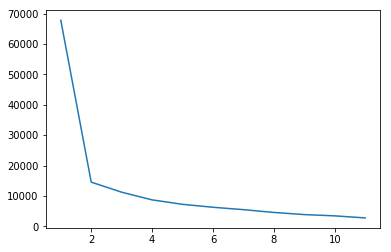

In [28]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

silohouette analysis

In [29]:
from sklearn.metrics import silhouette_score

In [32]:
sse_ = []
for k in range(2, 8):
    kmeans = KMeans(n_clusters=k).fit(daily_price_movement)
    sse_.append([k, silhouette_score(daily_price_movement, kmeans.labels_)])

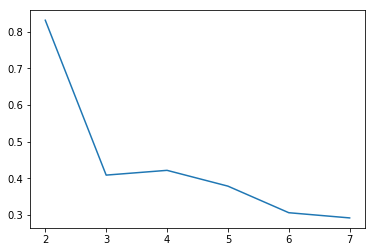

In [33]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

Elbow method helps us determine that 10 clusters should be optimal. That is the nubmer we will use to define our clusters in our kmeans clustering below. 

Importing libraries for k means clustering

In [18]:
#for KMeans clustering
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from sklearn.preprocessing import Normalizer

# Define normalizer
normalizer = Normalizer()

# Create a KMeans model - 10 clusters
kmeans = KMeans(n_clusters=10, max_iter = 1000)

# Make a pipeline chaining normalizer and kmeans
pipeline = make_pipeline(normalizer, kmeans)

In [19]:
# Fit pipeline to daily stock movements
pipeline.fit(daily_price_movement)

Pipeline(memory=None,
     steps=[('normalizer', Normalizer(copy=True, norm='l2')), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0))])

In [20]:
print(kmeans.inertia_)

8.207679843779571


In [22]:
# Import pandas
import pandas as pd

# Predict the cluster labels
labels = pipeline.predict(daily_price_movement)

# Create a DataFrame aligning labels and companies
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster label
print(df.sort_values('labels'))

                        companies  labels
19        (Northrop Grumman, NOC)       0
4                    (Boeing, BA)       0
13         (Lockheed Martin, LMT)       0
9                   (Intel, INTC)       1
23       (Texas Instruments, TXN)       1
1   (Advanced Micro Devices, AMD)       2
20                 (Nvidia, NVDA)       2
6                    (Delta, DAL)       3
14               (Southwest, LUV)       3
10                (JetBlue, JBLU)       3
0                   (Apple, AAPL)       4
17              (Microsoft, MSFT)       4
15               (MasterCard, MA)       4
22               (Symantec, SYMC)       4
2                  (Amazon, AMZN)       4
24                      (Visa, V)       4
5          (Bank of America, BAC)       5
18                (Navistar, NAV)       5
3         (American Express, AXP)       5
16               (McDonalds, MCD)       6
11       (Johnson & Johnson, JNJ)       6
8                      (IBM, IBM)       7
7         (General Electrics, GE) 

Visualization of the clusters 

After performing the Elbow and Silohouette analysis

In [34]:
#for KMeans clustering
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from sklearn.preprocessing import Normalizer

# Define normalizer
normalizer = Normalizer()

# Create a KMeans model - 10 clusters
kmeans = KMeans(n_clusters=6, max_iter = 1000)

# Make a pipeline chaining normalizer and kmeans
pipeline = make_pipeline(normalizer, kmeans)

In [35]:
# Fit pipeline to daily stock movements
pipeline.fit(daily_price_movement)

Pipeline(memory=None,
     steps=[('normalizer', Normalizer(copy=True, norm='l2')), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0))])

In [36]:
print(kmeans.inertia_)

11.947063402900643


In [37]:
# Import pandas
import pandas as pd

# Predict the cluster labels
labels = pipeline.predict(daily_price_movement)

# Create a DataFrame aligning labels and companies
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster label
print(df.sort_values('labels'))

                        companies  labels
12                (Coca Cola, KO)       0
21                   (Pepsi, PEP)       0
16               (McDonalds, MCD)       0
24                      (Visa, V)       0
11       (Johnson & Johnson, JNJ)       0
6                    (Delta, DAL)       1
14               (Southwest, LUV)       1
10                (JetBlue, JBLU)       1
23       (Texas Instruments, TXN)       2
22               (Symantec, SYMC)       2
17              (Microsoft, MSFT)       2
15               (MasterCard, MA)       2
0                   (Apple, AAPL)       2
8                      (IBM, IBM)       2
2                  (Amazon, AMZN)       2
9                   (Intel, INTC)       2
13         (Lockheed Martin, LMT)       3
4                    (Boeing, BA)       3
19        (Northrop Grumman, NOC)       3
25                (Walgreen, WBA)       3
20                 (Nvidia, NVDA)       4
1   (Advanced Micro Devices, AMD)       4
7         (General Electrics, GE) 

In [41]:
#for KMeans clustering
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from sklearn.preprocessing import Normalizer

# Define normalizer
normalizer = Normalizer()

# Create a KMeans model - 10 clusters
kmeans = KMeans(n_clusters=7, max_iter = 1000)

# Make a pipeline chaining normalizer and kmeans
pipeline = make_pipeline(normalizer, kmeans)

# Fit pipeline to daily stock movements
pipeline.fit(daily_price_movement)

Pipeline(memory=None,
     steps=[('normalizer', Normalizer(copy=True, norm='l2')), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
    n_clusters=7, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0))])

In [42]:
print(kmeans.inertia_)

11.217368830801469


In [43]:
# Import pandas
import pandas as pd

# Predict the cluster labels
labels = pipeline.predict(daily_price_movement)

# Create a DataFrame aligning labels and companies
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster label
print(df.sort_values('labels'))

                        companies  labels
23       (Texas Instruments, TXN)       0
9                   (Intel, INTC)       0
0                   (Apple, AAPL)       1
22               (Symantec, SYMC)       1
21                   (Pepsi, PEP)       1
17              (Microsoft, MSFT)       1
16               (McDonalds, MCD)       1
15               (MasterCard, MA)       1
24                      (Visa, V)       1
11       (Johnson & Johnson, JNJ)       1
12                (Coca Cola, KO)       1
2                  (Amazon, AMZN)       1
25                (Walgreen, WBA)       1
8                      (IBM, IBM)       2
7         (General Electrics, GE)       2
5          (Bank of America, BAC)       2
18                (Navistar, NAV)       2
3         (American Express, AXP)       2
20                 (Nvidia, NVDA)       3
1   (Advanced Micro Devices, AMD)       3
14               (Southwest, LUV)       4
6                    (Delta, DAL)       4
10                (JetBlue, JBLU) 